In [7]:
import pandas as pd
import numpy as np

# Lista de dados fornecidos
dados_nao_ordenado = [
    1.649, 1.470, 3.035, 3.706, 1.212, 2.041, 0.711, 1.520, 14.989, 19.103, 0.982, 10.229, 2.768, 2.107,
    0.426, 0.077, 3.049, 9.198, 3.967, 2.549, 6.394, 0.030, 1.479, 6.193, 3.201, 0.735, 5.298, 5.519,
    7.620, 5.263, 2.264, 7.834, 7.486, 0.385, 8.595, 2.147, 1.069, 3.202, 7.495, 3.284, 3.060, 2.165,
    13.553, 5.424, 6.725, 3.027, 4.048, 0.607, 2.658, 1.750, 1.190, 2.193, 8.103, 0.865, 0.016, 1.185,
    2.602, 0.056, 3.491, 1.167, 8.375, 4.116, 3.323, 1.056
]

# Lista dos dados ordenados
dados_ordenado = sorted(dados_nao_ordenado)

df = pd.DataFrame(dados_ordenado, columns=['Valores'])

print(df.head())

   Valores
0    0.016
1    0.030
2    0.056
3    0.077
4    0.385


In [8]:
media = df['Valores'].mean()

mediana = df['Valores'].median()

variancia = df['Valores'].var()

desvio_padrão = df['Valores'].std()

min = df['Valores'].min()

max = df['Valores'].max()

quartis = df['Valores'].quantile([0.25,0.5,0.75])

print(f"Media = {media:.2f} minutos")
print(f"Mediana = {mediana:.2f} minutos")
print(f"Variancia = {variancia:.2f} minutos\u00B2")
print(f"Desvio Padrão = {desvio_padrão:.2f} minutos")
print(f"Min = {min:.2f} minutos")
print(f"Max = {max:.2f} minutos")
print(f"Quartis = {quartis}")


Media = 3.92 minutos
Mediana = 2.90 minutos
Variancia = 14.18 minutos²
Desvio Padrão = 3.77 minutos
Min = 0.02 minutos
Max = 19.10 minutos
Quartis = 0.25    1.20650
0.50    2.89750
0.75    5.44775
Name: Valores, dtype: float64


c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


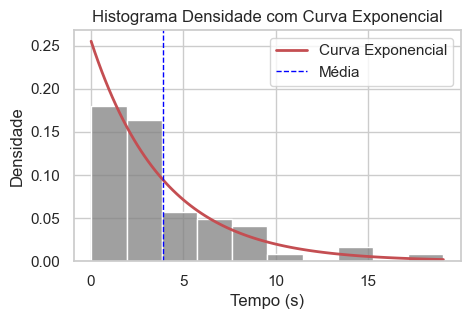

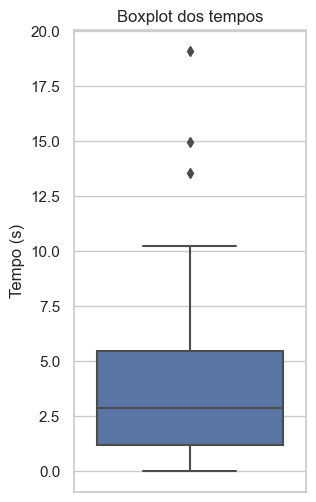

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
import numpy as np

# Calculando a média
media = df['Valores'].mean()

# Ajustar a distribuição exponencial aos dados da coluna 'Valores'
loc, scale = expon.fit(df['Valores'], floc=0)  # fixando loc = 0
x = np.linspace(0, df['Valores'].max(), 100)
y = expon.pdf(x, loc, scale)

# Configurando estilo de exibição do Seaborn
sns.set(style="whitegrid")

# Histograma com KDE e linha vertical para a média
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False, color='gray', stat='density')
plt.plot(x, y, 'r-', lw=2, label='Curva Exponencial')
plt.axvline(media, color='blue', linestyle='dashed', linewidth=1, label='Média')
plt.title('Histograma Densidade com Curva Exponencial')
plt.xlabel('Tempo (s)')
plt.ylabel('Densidade')
plt.xticks(np.arange(0, 20, 5))
plt.legend()
plt.show()
# Boxplot
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Valores'])
plt.title('Boxplot dos tempos')
plt.ylabel('Tempo (s)')
plt.yticks(np.arange(0, 22.5, 2.5))
plt.show()